Damit dieses Arbeitsblatt funktioniert, musst du als erstes den folgenden Code ausführen. Klicke dazu auf das Code Feld und drücke auf "Run" (oder drücke Shift + Enter).

In [1]:
# Damit das Arbeitsblatt funktioniert, muss das hier stehen.
include("code/loadfunctions.jl");
using Plots;
using LinearAlgebra;

# Schritt 1 | Nächsten Punkt finden
Leider ist das Lösen linearer Gleichungssysteme bei komplexen Problemstellungen nicht so einfach, weil die Messwerte von Geräten gemessen und angezeigt werden. Diese Messwerte sind immer fehlerbehaftet und somit entsprechen die Daten nicht zu hundert Prozent den exakten Werten. 

Was passiert wenn man fehlerbehaftete Daten hat beim Lösen von Gleichungssystemen?

**a)** Wir nehmen mal zunächst an, dass wir keine fehlerbehafteten Daten haben. Stellt dafür ein lineares Gleichungssystem bestehend aus zwei Gleichungen mit zwei Unbekannten auf, das eine eindeutige Lösung hat:

In [2]:
# eindeutig lösbares Gleichungssystem
A1 = [2 3;
      -1 1];

b1 = [4; 3]

CT.ueberpruefeeindeutigeLoesung2x2(A1,b1)

Super, ihr habt ein lineares Gleichungssystem aufgestellt, das sich eindeutig lösen lässt!
Eure Lösung lautet:
x1 = -1.0
x2 = 2.0


**b)** Wenn ihr euch zurück erinnert, hatten wir in unserem Gleichungssystem mehr Gleichungen als Unbekannte. Erweitert euer Gleichungssystem, indem ihr eine Gleichung hinzufügt, so dass sich die Lösung nicht ändert.

In [3]:
# erweitertes eindeutig lösbares Gleichungssystem
A2 = [2 3;
      -1 1;
      0 -1];
b2 = [4; 3; -2]
CT.ueberpruefeeindeutigeLoesung3x2(A1,b1,A2,b2)

Super, ihr habt ein lineares Gleichungssystem aufgestellt, das sich eindeutig lösen lässt!
Eure Lösung lautet:
x1 = -1.0
x2 = 2.0


**c)** Wie weiter oben erwähnt haben Messwerte jedoch immer Messfehler. Das bedeutet, dass euer Vektor $b2$ etwas abgeändert werden muss, um diese Messfehler zu simulieren. Nehmt erneut das Gleichungssystem aus **b)** und ändert nur einen der Einträge aus eurem *b2* Vektor. 

   *Hinweis:* Lasst die Werte bei blick1 und blick2 erstmal so stehen.

Ihr habt den Vektor korrekt verändert. Das führt dazu, dass es keine Lösung mehr hat.
Das Problem ist, dass egal, welchen Vektor man als x bei A*x von euch einsetzt, bekommt man nicht euren b-Vektor heraus. Veranschaulicht könnt ihr das in der folgenden Graphik sehen. Alle möglichen b-Vektoren für unterschiedliche x liegen in der roten Ebene. Eure Punkt jedoch liegt außerhalb.


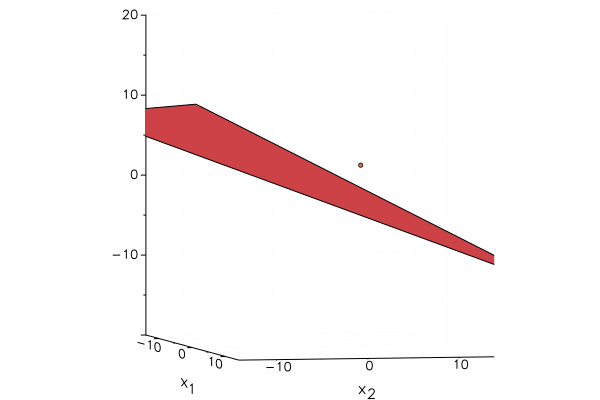

Ändert solange die Werte für blick1 und blick2, so dass man erkennt, dass der Punkt neben der Ebene liegt.


In [4]:
# erweitertes nicht mehr lösbares Gleichungssystem
A3 = [2 3;
      -1 1;
      0 -1];
b3 = [4; 3; 3];
blick1 = 70; #Azimutwinkel
blick2 = 10; #Anhebung
u,v = CT.ueberpruefekeineLoesung(A1,b1,A3,b3,blick1,blick2);

**d)** Wir müssen uns also überlegen, wie wir dennoch dieses Gleichungssystem lösen können und die optimale Lösung finden. Überlegt euch, welcher Punkt der Ebene, als nächster Punkt und somit optimale Lösung für das Gleichungssystem verwendet werden könnte. ($\bigstar$ Blatt)

   |Der nächste Punkt ist der durch den die Gerade läuft, welche $Wort1$ zur Ebene steht. Der Richtungsvektor dieser Gerade ist also der $Wort2$ der Ebene.|
---

   *Hinweis:* Falls ihr nicht wisst, welche Wörter ihr hier einsetzen sollt, könnt ihr googeln.

In [5]:
# Satzvervollständigung
Wort1 = "senkrecht";
Wort2 = "Normalenvektor"

CT.ueberpruefeSatzvervollstaendigung2(Wort1,Wort2);

Eure Antwort für Wort1 und Wort2 sind beide korrekt!


**e)** Berechnet den Richtungsvektor der gesuchten Gerade und gebt die einzelnen Koordinaten im unteren Codetteil ein. 

   Wenn ihr den folgenden Codeteil ohne, dass ihr etwas eingegeben habt, durchlaufen lasst, so erhaltet ihr beide Richtungsvektoren eurer Ebene.

   *Hinweis:* Zu dieser Aufgabe könnt ihr euch bei Bedarf Hilfekarten 10 und 11 anschauen.

In [6]:
# Richtungsvektoren der Ebene
nx1 = 1; 
nx2 = 1.9995;
nx3 = 4.9994;

CT.ueberpruefenormalenVektor(u,v,nx1,nx2,nx3,b3)

Eure Richtungsvektoren lauten:
u = -0.9669
    -0.1015
    0.234

v = 0.1781
    -0.9254
    0.3345

Ihr habt den Normalenvektor korrekt berechent! Euer Schnittpunkt P lautet:
P = 0.8334
    -3.4702
    -1.0604



Julia hat auch solch eine Methode, die immer das nächste Objekt berechnet, die wird im weiteren Verlauf für die Rekonstruktion der Bildes verwenden werden. 

# Schritt 2 | Rekonstruktion eines Objekts
Im zweiten Arbeitsblatt haben wir es geschafft ein allgemeines Verfahren für die Erstellung der Matrix $A$ des Gleichungssystems $A\cdot\vec{f} = \vec{m}$ zu erstellen. Im ersten Schritt von diesem Arbeitsblatt haben wir uns mit der Lösbarkeit des linearen Gleichungssystems beschäftigt, wenn wir Messfehler mit berücksichtigen. Dieses Wissen wollen wir nun nutzen, um zunächst ein bekanntes Objekt zu rekonstruieren. Das Verfahren, das wir entwickeln, wollen wir dann am Ende auf unbekannte Bilder übertragen. Wir verwenden echte Computertomographie Scanbilder der Brust eines Menschen. Das verwendete Bild sieht wie folgt aus:

![alternative text](figs/CT512x5122.jpg)

Dieses Bild betrachten wir im Folgenden zunächst einmal in weniger guter Auflösung und erhöhen diese immer weiter, um unser Lösungsverfahren auf Genauigkeit zu untersuchen.

**a)** Das Bild des Brustkorbes wird durch den folgenden Code aufgerufen. Durch das Verändern der Zahl hinter Aufloesung, kann die Auflösung des Bildes verändert werden. Beachte, dass für die Auflösung nur Zweierpotenzen, also $2^j$, eingegeben werden können. Je größer die Zahl, die ihr wählt, desto länger dauert das Durchlaufen des Codes.

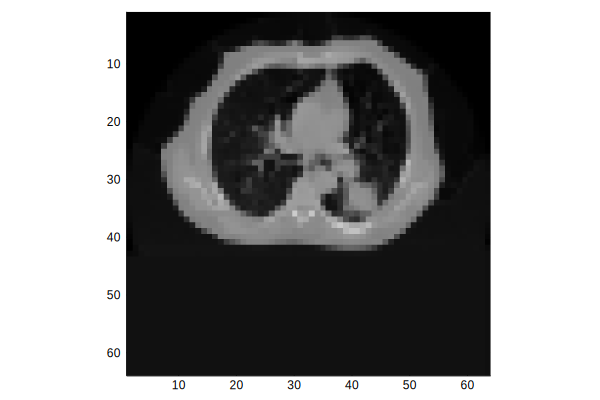

In [44]:
# Zielbild
Aufloesung = 64;
Phantom = CT.echteCTDaten(Aufloesung);
plot(Phantom,ratio = :equal)

**b)** Lasst den folgenden Codeteil durchlaufen, um zu sehen, was passiert wenn man die von euch bestimmte Methode aus Arbeistblatt 2 und das Programm von Julia verwendet, das immer die nächste Lösung sucht. Hierbei werden Messfehler berücksichtigt. Ihr könnt bestimmen wie groß der Fehler prozentual zu der Größe der exakten Messwerte ist, indem ihr eine Prozentzahl bei prozent eingebt. Gebt diese als eine Dezimalzahl ein.

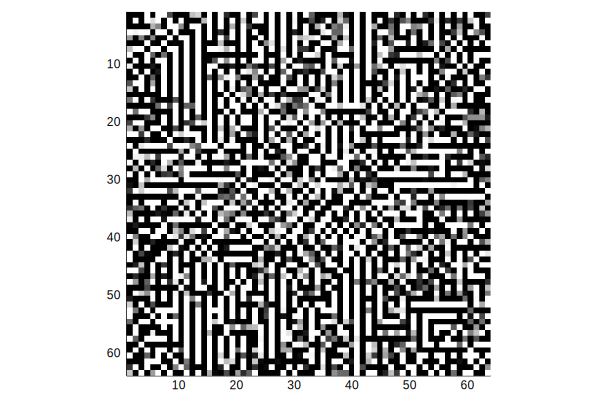

In [45]:
# Nächstes Objekt finden 
prozent = 0.1;
f,fr,m,mr,A,Bild = CT.findenaechstesBild(Aufloesung,prozent);
plot(Bild,ratio = :equal)


**c)** Es wird schnell klar, dass bei der Berücksichtigung der Fehler die Methode von Julia ein Bild rekonstruiert, das nicht sehr nah an dem gesuchten Bild ist. Doch wie groß ist denn der dadurch entstehende Fehler?

   Schreibt im folgenden Codeteil die Formel zur Fehlerberechnung zwischen dem Vektor vom gesuchten Bild $f$ und dem rekonsturierten $fr$.

In [46]:
# Berechung des Fehlers
Fehler = norm(f-fr)*100/norm(f);

CT.ueberpruefeerror(Fehler,f,fr);

Eure Formel für den relativen Fehler ist korrekt! Der Fehler beträgt: 213.3811


Der große Fehler zeigt, dass die Rekonstruktionsmethode optimiert werden muss. 

Um das Bild mit fehlerbehafteten Daten besser zu rekonstruieren, benötigen wir eine neue Formel, da die aus **Schritt 1** nicht ausreicht, um ein Bild zu rekonstruieren auf dem man etwas erkennen und diagnostizieren könnte. Schaut man sich die Größe der Einträge von $fr$ an, so stellt man fest, dass diese sehr viel größer sind, als die aus $f$. Es muss eine Formel erstellt werden, die dafür sorgt, dass die Einträge von $fr$ klein bleiben. Das erreicht man durch das Bestrafen großer Einträge in $fr$ und man anschließend den optimalen $fr$-Vektor sucht.

Beim Optimieren muss die Balance gehalten werden, wie stark man das lineare Gleichungssystem abändert und wie große Einträge man in dem $fr$-Vektor zulässt. Deshalb kommt ein neiner Parameter $p$ ins Spiel. Im Folgenden muss also das optimale p bestimmt werden, so dass der Fehler zwischen der Rekonstruktin und dem gewünschten Bild minimiert wird. 

**d)** Setzt hierfür im Folgenden Zahlen für $p$ ein und probiert die bestmögliche Rekonstruktion f_optimal zu erzeugen. Es wird euch zusätzlich der relative Fehler mit ausgegeben. ($\bigstar$ Blatt)

Der Fehler beträgt: 10.282366149714441


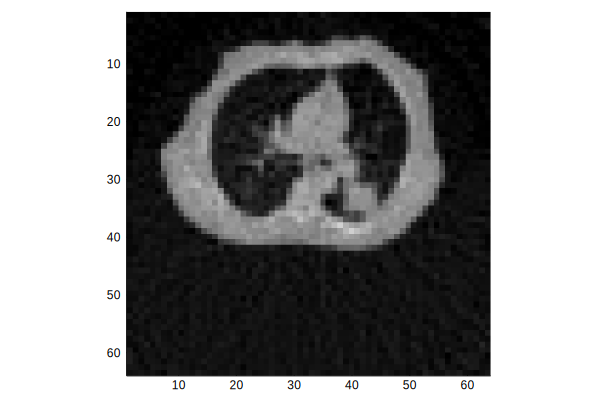

In [47]:
# Optimales p finden
p = 1;

Bild = CT.ueberpruefep(A,fr,Aufloesung,p,f,m,mr);
plot(Bild,ratio = :equal)

# Schritt 3 | Rekonstruktion anderer Objekte
Im letzten Schritt müssen wir überprüfen, ob die Rekonstruktion auch bei anderen Bildern gut genug funktioniert, um zu erkennen, was abgebildet wird. Hierfür habt ihr die Möglichkeit aus acht verschiedenen Bilder auszuwählen. Die Bilder heißen Bild1, ..., Bild8. Sucht euch eins aus und schreibt dieses hinter Auswahl. Notiert euch anschließend, was ihr erkennt und, ob die Qualität in Ordnung oder ausbaufähig ist. ($\bigstar$ Blatt)

Der Fehler beträgt: 12.73982328703076


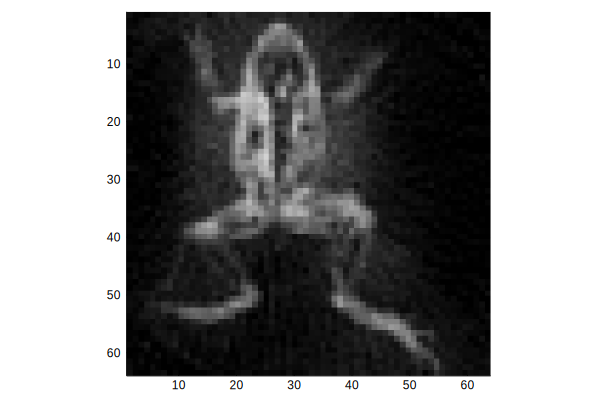

In [48]:
# Rekonstruktion anderer Objekte
Auswahl = "Bild8";
Aufloesung = 64;
prozent = 0.1;
p = 1;
Rekonstruktion = CT.Bilderrekonstruktion(Auswahl,Aufloesung,prozent,p);
plot(Rekonstruktion,ratio = :equal)

# Zusatzaufgabe zur Bestimmung der nächsten Lösung
Die Methode, die von der Programmiersprache Julia verwendet wird, ist etwas anders, als die die ihr in Schritt 1 erarbeitet habt. Die Zusatzaufgabe dient dazu etwas besser nachzuvollziehen, was Julia macht. Bearbeitet hierfür die nächsten Arbeitsschritte.

Setzt zunächst im Code für die folgenden Schritte die "Aufloesung = 4". Bestimmt die Grauwerte f des Bildes, dessen Messwerte den Messwerten des gegeben Bildes, genannt Messwerte, am nächsten kommt. Hierbei gilt erneut der Zusammenhang $A\cdot\vec{f}=\vec{m}$.

* Formuliert das Ziel der Optimierung aus der Aufgabenstellung in euren eigenen Worten. ($\bigstar$ Blatt)
* Gebt zur Bestimmung von f zuerst eure erste Formel ein, die ihr verwenden wollt, um die Grauwerte zu bestimmen, die durch die Multiplikation mit $A$ den Messwerten des gegeben Bildes am nächsten kommt. 

    *Hinweis:* Zu dieser Aufgabe könnt ihr euch bei Bedarf Hilfekarte 12 anschauen.
    
    *Hinweis:* Der Betrag bei Vektoren $||\vec{f}||$ wird Norm genannt und der Befehl hierfür lautet norm(f).

In [49]:
# erste Formel ohne Umformungen
Aufloesung = 4;
Formel(A,f,Messwerte) = norm(A*f-Messwerte)^2;

Messwerte,A,OriginalVektor,AnzReihenA,AnzSpaltenA,Schritt = CT.ueberpruefeFormel(Formel,Aufloesung);

Eure Formel für den Abstand ist korrekt!


* Vervollständigt den hier drunter stehenden Satz. Ersetzt dafür Wort3 und Wort4 durch die passenden Wörter oder Zahlen. ($\bigstar$ Blatt)

|Um das Grauwerte des nächsten Bildes zu bestimmen, muss die obige Formel $Wort3$ und gleich $Wort4$ gesetzt werden.|
---

In [50]:
# Satzvervollständigung
Wort3 = "abgeleitet";
Wort4 = "null";

CT.ueberpruefeSatzvervollstaendigung(Wort3,Wort4);

Eure Antwort für Wort3 und Wort4 sind beide korrekt!


* Um das durchzuführen, muss die von euch erstellte Formel erst einmal umgefort werden. Da die von uns verwendete Matrix und der Messwertevektor sehr groß sind, schauen wir uns das ganze an einem kleineren Beispiel an und anschließend wird die Vorgehensweise vom Code in Hintergrund auf unsere komplexere Situation übertragen. 

   Verwendet also im weiteren Verlauf die unten stehende Matrix $A$ und die beiden Vektoren $f$ und $Messwerte$ und formt eure Formel soweit wie möglich um. Macht diesen Schritt auf dem Papier bis ihr die Formel nicht weiter umformen könnt.

   $A= \pmatrix{A_{1,1}&A_{1,2}\cr A_{2,1}&A_{2,2}}\qquad f= \pmatrix{f_{1}\cr f_{2}} \qquad Messwerte=\pmatrix{m_{1}\cr m_{2}}$.
   
   Wenn ihr nicht wisst, wie man Matrizen und Vektoren miteinander multipliziert, schaut euch das folgende Video an: [Matrizen-Video](https://www.youtube.com/watch?v=HDZhDx4lQBU&list=PLjaA00udJtOq5N_AcSCFyeE8_OOiQMwmD).
   
   *Erinnerung:* Schaut auf euer Variablen-Blatt um euch zu erinnern, wie auf die Einträge einer Matrix oder einem Vektor zugegeriffen werden.
   
   *Hinweis:* Wenn ihr euren Fehler bei den Umformungen nicht findet, steht die Musterlösung in Hilfekarte 13 als Überprüfung zur Verfügung.

In [51]:
# Formel umgeformt
Formel_neu(f,A,m) = (A[1,1]*f[1]+A[1,2]*f[2]-m[1])^2+(A[2,1]*f[1]+A[2,2]*f[2]-m[2])^2;

CT.ueberpruefeneueFormel(Formel_neu);

Eure Umformungen waren korrekt!
Wir müssen einzeln nach f_1 und f_2 ableiten. Im Ergebnis steht die Ableitung nach f_1 in der ersten und nach f_2 in der zweiten Zeile.
Das Ziel ist es hierfür wieder eine Kurzschreibweise zu finden. Fasst dafür euer Ergbnis soweit wie möglich zusammen.
Berechnet dafür transpose(A)*A*f und transpose(A)*m. Schaut, ob euch das bekannt vorkommt.
transpose(A) nennt man die Transponierte von A.
Macht all diese Schritte auf einem Papier.


Der Unterschied zwischen Matrix $A$ und der transponierten von $A$ ist, dass rot markierten Einträge in der transponierten Matrix ihre Position getauscht haben.

$transpose(A)=\pmatrix{A_{1,1}&\color{red}{A_{2,1}}\cr \color{red}{A_{1,2}}&A_{2,2}}$

* Gebt eure abgeleitete und zusammengefasste Formel hier ein:
  
   *Hinweis:* Zu dieser könnt ihr euch bei Bedarf Hilfekarten 14 und 15 anschauen.

In [53]:
# Ableitung
Ableitung(f) = 2*transpose(A)*A*f-2*transpose(A)*Messwerte;

CT.ueberpruefeAbleitung(Ableitung,A,Messwerte);

Eure Ableitung ist korrekt!


* Formt diese Gleichung nach f_nah um. Um ein Gleichungssystem, wie $A\cdot x=b$ mit Matlab nach $x$ aufzulösen, schreibt man: **x = A\b**.

   *Hinweis:* Zu dieser könnt ihr euch bei Bedarf Hilfekarten 16 und 17 anschauen.

Eure Formel für das nächste Objekt am Original ist korrekt!


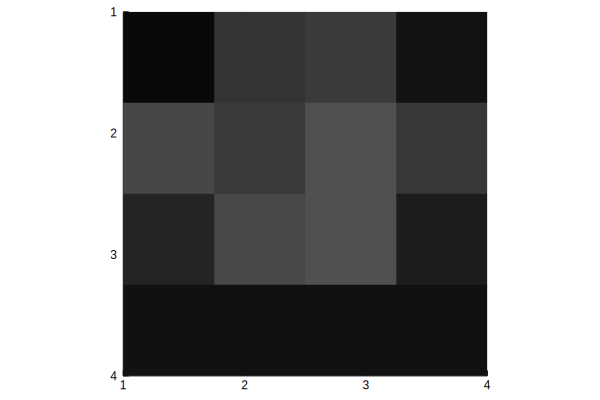

In [55]:
# Nächstes Objekt finden
f = (transpose(A)*A)\(transpose(A)*Messwerte);

f,Bild = CT.ueberpruefef_nah(f,A,Messwerte,Aufloesung,Schritt);
plot(Bild,ratio = :equal)

# Zusatzaufgabe zum Einfluss des Parameters p
In der ersten Zusatzaufgabe habt ihr gesehen, dass Julia probiert $||A\cdot \vec{fr}-\vec{m}||_2^2$ zu minimieren. Das reicht jedoch nicht aus für fehlerbehaftete Daten.

Bei **Schritt 2 d)** wurde euch folgendes gesagt: 

Um das Bild mit fehlerbehafteten Daten besser zu rekonstruieren, benötigen wir eine neue Formel, um ein Bild zu rekonstruieren auf dem man etwas erkennen und diagnostizieren könnte. Schaut man sich die Größe der Einträge von $fr$ an, so stellt man fest, dass diese sehr viel größer sind, als die aus $f$. Es muss eine Formel erstellt werden, die dafür sorgt, dass die Einträge von $fr$ klein bleiben. Das erreicht man durch das Bestrafen großer Einträge in $fr$ und man anschließend den optimalen $fr$-Vektor sucht.

Beim Optimieren muss die Balance gehalten werden, wie stark man das lineare Gleichungssystem abändert und wie große Einträge man in dem $fr$-Vektor zulässt. Deshalb kommt ein neuner Parameter $p$ ins Spiel. Das erreicht man durch das addieren eines kleinen Summandens: 

$||A\cdot \vec{fr}-\vec{m}||_2^2+p\cdot||\vec{fr}||_2^2$.

Formt diese Formel, so um, wie ihr es bei der **Zusatzaufgabe zur Bestimmung der nächsten Lösung** gemacht habt und bestimmt eine Formel für f unter Berücksichtigung der Messfehler. Überlegt, was ihr aus euren Berechnungen und Überlegungen bei der ersten Zusatzaufgabe direkt übernehmen könnt, bevor ihr loslegt.

Die einzelnen Schritte waren die Folgenden:

* Um die Formel abzuleiten und gleich Null setzen zu können, muss die obige Formel erst einmal umgefort werden. Formt die Formel soweit wie möglich um, indem ihr die folgende Matrix und die folgenden Vektoren verwendet:

    $A= \pmatrix{A_{1,1}&A_{1,2}\cr A_{2,1}&A_{2,2}}\qquad transpose(A)= \pmatrix{A_{1,1}&A_{2,1}\cr A_{1,2}&A_{2,2}}\qquad fr= \pmatrix{f_{1}\cr f_{2}} \qquad mr=\pmatrix{m_{1}\cr m_{2}}$.

* Formt diese Gleichung nach $fr$ um. Um ein Gleichungssystem, wie  mit Matlab nach  aufzulösen, schreibt man: x = A\b.

    *Hinweis:* Für diese Aufgabe könnt ihr euch bei Bedarf Hilfekarte 18 anschauen.

In [69]:
# Nächstes Objekt finden
f_nahfehlerneu(mr) = (transpose(A)*A+p*I)\(transpose(A)*mr);

CT.ueberpruefef_nahfehler(f_nahfehlerneu,A,Messwerte,p);

Eure Formel für das nächste Objekt am Original ist korrekt!
